In [ ]:
!pip install datasets



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# General utilities
import numpy as np
import pandas as pd
import re
import zipfile
import os
import gc

#Text cleaning
import re
import spacy
import string


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sklearn utilities
from sklearn.model_selection import train_test_split

# LSTM preprocessing


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# DistilBERT preprocessing
from transformers import DistilBertTokenizerFast
from datasets import Dataset as HFDataset
from transformers import DataCollatorWithPadding

import nltk
import spacy

from collections import Counter, OrderedDict
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the ZIP file on Drive
zip_path = "/content/drive/MyDrive/yelpdataset.zip"
extract_path = "/content/yelp_dataset_extracted"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped the Yelp dataset.")

✅ Unzipped the Yelp dataset.


In [ ]:
# Load only a sample of review data (100,000 rows)
review_chunk = pd.read_json("/content/yelp_dataset_extracted/yelp_academic_dataset_review.json", lines=True, chunksize=100000)
df_review = next(review_chunk)

# Load full business data
df_business = pd.read_json("/content/yelp_dataset_extracted/yelp_academic_dataset_business.json", lines=True)

In [ ]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
# Merge review + business data on business_id
df_merged = pd.merge(df_review, df_business, on='business_id', how='inner')

# Keep only Restaurant or Hotel reviews
hospitality_reviews = df_merged[
    df_merged['categories'].str.contains('Restaurant|Hotel', na=False, case=False)
]


In [ ]:
df_merged.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


In [ ]:
df_merged.to_csv("merged_yelp_data.csv", index=False)

from google.colab import files
files.download("merged_yelp_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use stars from review dataset
df_filtered = hospitality_reviews[['text', 'stars_x']].copy()
df_filtered = df_filtered.rename(columns={'stars_x': 'stars'})

# Map star ratings to sentiment
def map_sentiment(star):
    if star <= 2:
        return 0  # Negative
    elif star == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df_filtered['sentiment'] = df_filtered['stars'].apply(map_sentiment)


In [ ]:
df_filtered.head()


,text,stars,sentiment
0,"If you decide to eat here, just be aware it is...",3,1
2,Family diner. Had the buffet. Eclectic assortm...,3,1
3,"Wow! Yummy, different, delicious. Our favo...",5,2
4,Cute interior and owner (?) gave us tour of up...,4,2
5,I am a long term frequent customer of this est...,1,0


In [ ]:

df_filtered.to_csv("df_filtered.csv", index=False)
from google.colab import files
files.download("df_filtered.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Upsampling

In [ ]:
import random
import nltk
from nltk.corpus import wordnet
import pandas as pd

# Skip nltk.download() lines – we're using a basic tokenizer now

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.name().lower() != word.lower():
                synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

def synonym_replacement(sentence, n=2):
    # Simple tokenizer replacement for offline use
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word.isalpha()]))
    random.shuffle(random_word_list)

    num_replaced = 0
    for word in random_word_list:
        synonyms = get_synonyms(word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_words = [synonym if w == word else w for w in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return ' '.join(new_words)

def augment_dataframe(df, label_col='sentiment', text_col='text', target_label=1, augment_count=1000):
    subset = df[df[label_col] == target_label]
    augmented_texts = []

    for i in range(min(augment_count, len(subset))):
        original_text = subset.iloc[i][text_col]
        augmented_text = synonym_replacement(original_text, n=2)
        augmented_texts.append({
            text_col: augmented_text,
            label_col: target_label,
            'stars': subset.iloc[i]['stars']  # Keep original stars if needed
        })

    return pd.DataFrame(augmented_texts)


In [ ]:
# Load the original dataset
df_filtered = pd.read_csv("df_filtered.csv")

# Step 1: Check original class distribution
class_counts = df_filtered['sentiment'].value_counts()
majority_count = class_counts.max()

# Step 2: Build augmentation plan
augment_plan = {}
for label, count in class_counts.items():
    if count < majority_count:
        augment_plan[label] = majority_count - count

# Step 3: Apply augmentation for each minority class
augmented_dfs = []
for target_label, augment_count in augment_plan.items():
    aug_df = augment_dataframe(df_filtered, target_label=target_label, augment_count=augment_count)
    augmented_dfs.append(aug_df)

# Step 4: Combine original + synthetic samples
balanced_df = pd.concat([df_filtered] + augmented_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# (Optional) Check class distribution after balancing
print("✅ New class distribution:\n", balanced_df['sentiment'].value_counts())


✅ New class distribution:
 sentiment
2    52524
0    29162
1    19196
Name: count, dtype: int64


colde to visualize before and after upsampling

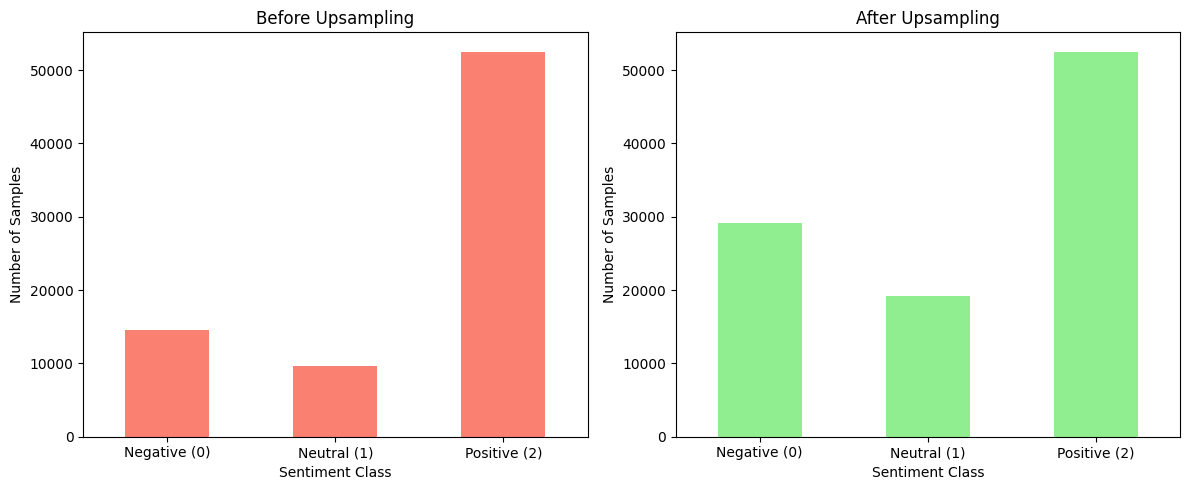

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original and upsampled datasets
df_filtered = pd.read_csv("df_filtered.csv")
upsampled_df = balanced_df.copy()  # Assuming you have the upsampled dataset

# Count class frequencies
before_counts = df_filtered['sentiment'].value_counts().sort_index()
after_counts = upsampled_df['sentiment'].value_counts().sort_index()

# Labels for x-axis
labels = ['Negative (0)', 'Neutral (1)', 'Positive (2)']

# Plot side-by-side bar charts
plt.figure(figsize=(12, 5))

# Before upsampling
plt.subplot(1, 2, 1)
before_counts.plot(kind='bar', color='salmon')
plt.title('Before Upsampling')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=0)

# After upsampling
plt.subplot(1, 2, 2)
after_counts.plot(kind='bar', color='lightgreen')
plt.title('After Upsampling')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample
import pandas as pd

# Target count = match the highest of the two minority classes
target_count = max(
    balanced_df[balanced_df['sentiment'] == 0].shape[0],
    balanced_df[balanced_df['sentiment'] == 1].shape[0]
)

# Separate majority and minority classes
positive_df = balanced_df[balanced_df['sentiment'] == 2]
other_df = balanced_df[balanced_df['sentiment'] != 2]

# Downsample positive class
positive_downsampled = resample(
    positive_df,
    replace=False,
    n_samples=target_count,
    random_state=42
)

# Combine into a new fully balanced DataFrame
fully_balanced_df = pd.concat([other_df, positive_downsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# (Optional) Check new distribution
print("✅ New class distribution after downsampling:\n", fully_balanced_df['sentiment'].value_counts())


✅ New class distribution after downsampling:
 sentiment
0    29162
2    29162
1    19196
Name: count, dtype: int64


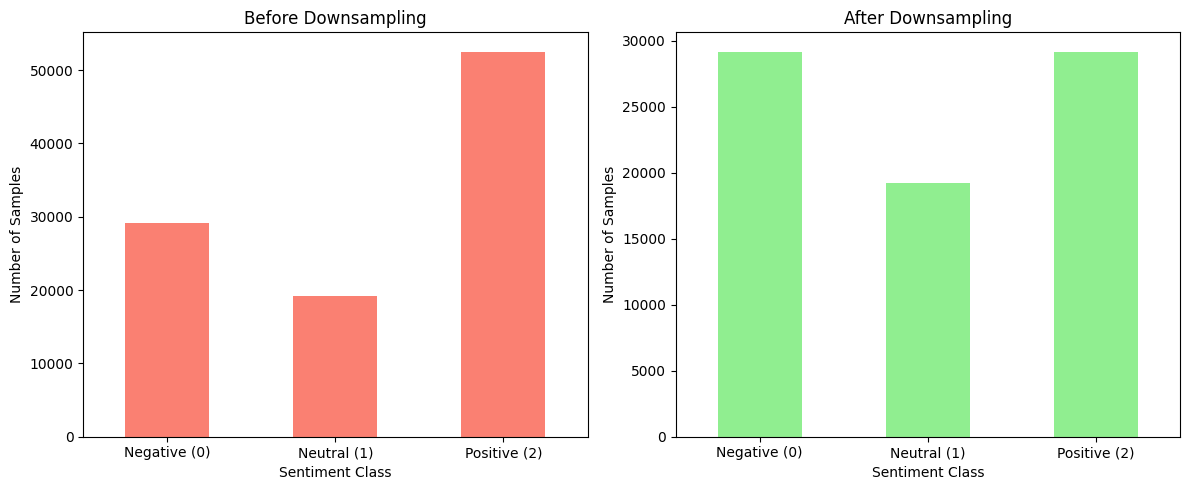

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original and upsampled datasets
fully_balanced_df = pd.read_csv("fully_balanced_df.csv")
upsampled_df = balanced_df.copy()  # Assuming you have the upsampled dataset

# Count class frequencies
before_counts = upsampled_df['sentiment'].value_counts().sort_index()
after_counts = fully_balanced_df['sentiment'].value_counts().sort_index()

# Labels for x-axis
labels = ['Negative (0)', 'Neutral (1)', 'Positive (2)']

# Plot side-by-side bar charts
plt.figure(figsize=(12, 5))

# Before upsampling
plt.subplot(1, 2, 1)
before_counts.plot(kind='bar', color='salmon')
plt.title('Before Downsampling')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=0)

# After upsampling
plt.subplot(1, 2, 2)
after_counts.plot(kind='bar', color='lightgreen')
plt.title('After Downsampling')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
fully_balanced_df.to_csv("fully_balanced_df.csv", index=False)
from google.colab import files
files.download("fully_balanced_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EDA (before preprocessing)

In [ ]:
fully_balanced_df = pd.read_csv("/content/fully_balanced_df.csv")
df= fully_balanced_df.copy()
print("\n--- Null and Duplicate Check ---")
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


--- Null and Duplicate Check ---
Null values:
 text         0
stars        0
sentiment    0
dtype: int64

Duplicate rows: 10


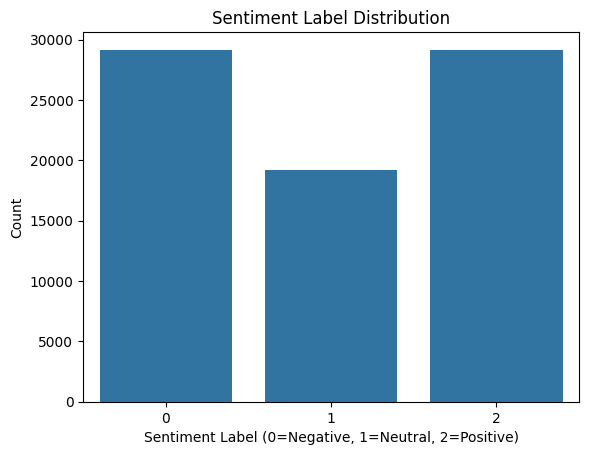

In [ ]:
# Label distribution

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment Label (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Count")
plt.show()

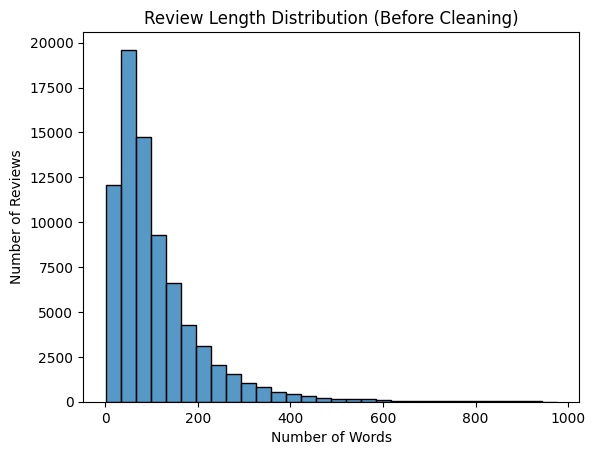

In [ ]:
# Review lengths

df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Plot histogram of review lengths
sns.histplot(df['review_length'], bins=30, kde=False)
plt.title("Review Length Distribution (Before Cleaning)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

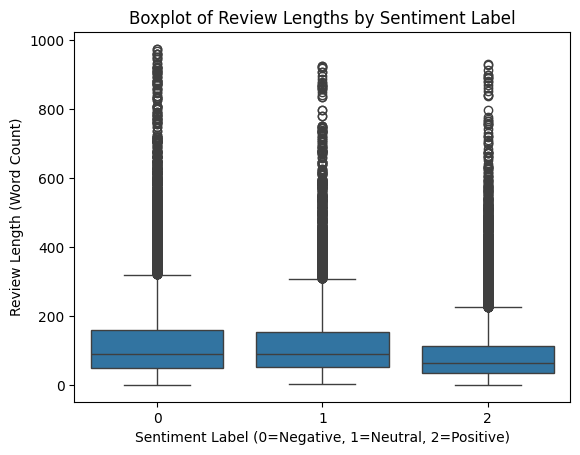

In [ ]:
# Boxplot of lengths by label

sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Boxplot of Review Lengths by Sentiment Label")
plt.xlabel("Sentiment Label (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Review Length (Word Count)")
plt.show()

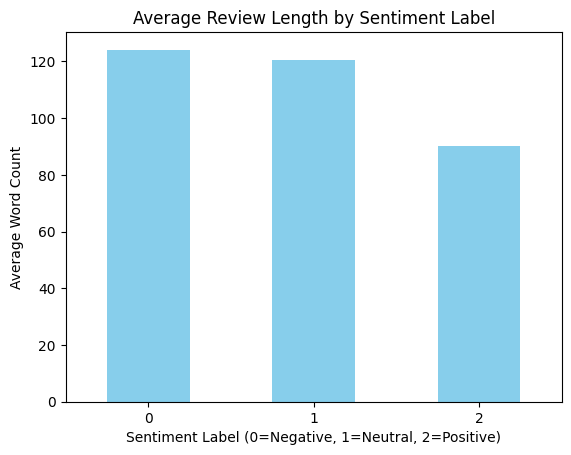

In [ ]:
# Avg length per label

avg_len = df.groupby('sentiment')['review_length'].mean()

# Bar plot of average length by sentiment
avg_len.plot(kind='bar', color='skyblue')
plt.title("Average Review Length by Sentiment Label")
plt.xlabel("Sentiment Label (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Average Word Count")
plt.xticks(rotation=0)
plt.show()

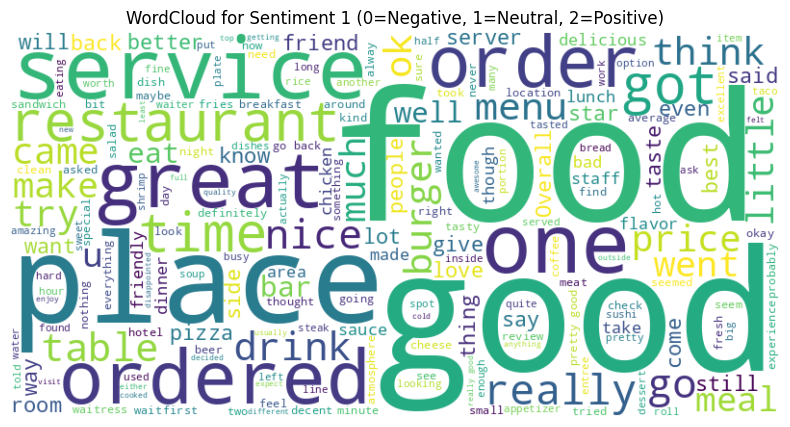

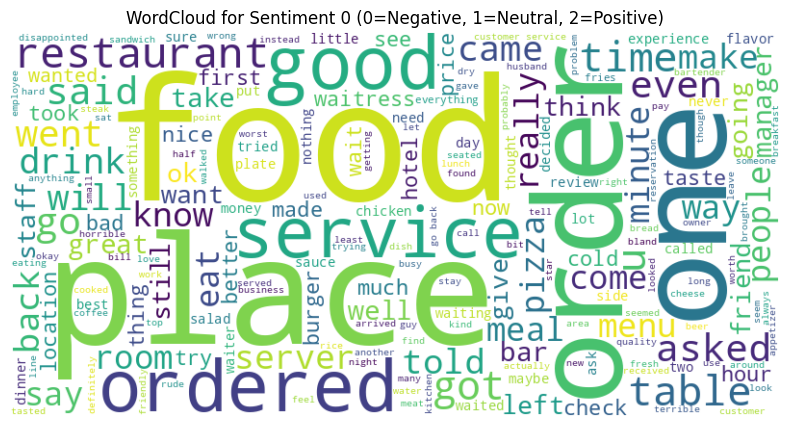

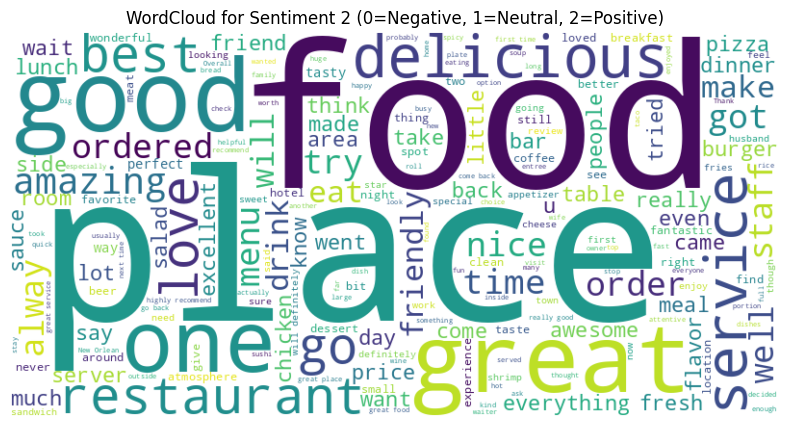

In [ ]:
# WordClouds by label
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordClouds for each sentiment class
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for Sentiment {sentiment} (0=Negative, 1=Neutral, 2=Positive)")
    plt.show()

Text Cleaning

In [ ]:
import pandas as pd
import re
import spacy
from tqdm import tqdm

# Load spaCy English model with parser/NER disabled for speed
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Emoji pattern (same as before)
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    "]+", flags=re.UNICODE)

# Step 1–5: Fast cleaning before spaCy (remove HTML, emojis, punctuation, etc.)
def basic_clean(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", "", text)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Step 6–7: Optimized spaCy-based processing for lemmatization + stopword removal
def clean_dataframe_with_pipe(df, text_col="text", batch_size=512):
    texts = df[text_col].apply(basic_clean).tolist()
    cleaned_texts = []

    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size), total=len(texts), desc="Cleaning Text"):
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        cleaned_texts.append(" ".join(tokens))

    df["clean_text"] = cleaned_texts
    return df


In [ ]:
df = pd.read_csv("/content/fully_balanced_df.csv")
df = clean_dataframe_with_pipe(df, text_col="text")


Cleaning Text: 100%|██████████| 77520/77520 [10:20<00:00, 124.88it/s]


In [ ]:
df_cleaned = df.copy()
# Save DataFrame to CSV
df_cleaned.to_csv("cleaned_yelp_reviews.csv", index=False)
from google.colab import files
files.download("cleaned_yelp_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cleaned.head()

,text,stars,sentiment,clean_text
0,1 unremarkably pop in here after getting some ...,3,1,unremarkably pop get goody farmer market satur...
1,It's like they have the blind leading the blin...,1,0,like blind lead blind order deluxe pizza open ...
2,"Methinks we just had a bad night, a really bad...",1,0,methink bad night bad night boyfriend go sage ...
3,"Gosh, I feel like giving Villagio zero stars b...",3,1,gosh feel like give villagio zero star base ex...
4,"I'm a foodie from the Carolina's, so I have a ...",5,2,m foodie carolinas high standard certain food ...


In [ ]:
df_cleaned.tail()

,text,stars,sentiment,clean_text
77515,I have a real hard time with this place. Last ...,3,1,real hard time place time not let base shoe bo...
77516,Very welcoming environment!! The interior has ...,5,2,welcoming environment interior appeal beautifu...
77517,Bonk's is a Crab Paradise...\n\nperfectly seas...,4,2,bonk crab paradise perfectly seasoned crab cou...
77518,An OK Italian restaurant in Philadelphia's Lit...,2,0,ok italian restaurant philadelphia little ital...
77519,"The views are great! The food is good, but not...",3,1,view great food good worth price server fantas...


In [ ]:


# Calculate cleaned text lengths
df_cleaned['clean_len'] = df_cleaned['clean_text'].apply(lambda x: len(x.split()))

# Print cleaned length statistics
print("\n📊 Cleaned Text Length Stats:")
print("Mean:", df_cleaned['clean_len'].mean())
print("Max:", df_cleaned['clean_len'].max())
print("Median:", df_cleaned['clean_len'].median())


📊 Cleaned Text Length Stats:
Mean: 48.68573271413829
Max: 476
Median: 36.0


In [ ]:
df_cleaned.describe()

,stars,sentiment,clean_len
count,77520.000000,77520.0000,77520.000000
mean,3.024897,1.0000,48.685733
std,1.429293,0.8674,42.589125
min,1.000000,0.0000,0.000000
25%,2.000000,0.0000,21.000000
50%,3.000000,1.0000,36.000000
75%,4.000000,2.0000,62.000000
max,5.000000,2.0000,476.000000


In [ ]:
df = pd.read_csv("/content/cleaned_yelp_reviews.csv")
# Encode labels
label_map = {0: 0, 1: 1, 2: 2}
df['label'] = df['sentiment'].map(label_map)

In [ ]:

# === 2. LSTM-Specific Preprocessing ===
# Build vocab
token_counter = Counter()
for tokens in df['tokens']:
    token_counter.update(tokens)
sorted_tokens = sorted(token_counter.items(), key=lambda x: x[1], reverse=True)
token_dict = OrderedDict(sorted_tokens)
specials = ['<pad>', '<unk>']
lstm_vocab = build_vocab(token_dict, specials=specials)
lstm_vocab.set_default_index(lstm_vocab['<unk>'])

# Convert tokens to input_ids for LSTM
df['lstm_input_ids'] = df['tokens'].apply(lambda tokens: [lstm_vocab[token] for token in tokens])

# Save LSTM dataset
lstm_df = df[['lstm_input_ids', 'label']].copy()
lstm_train, lstm_temp = train_test_split(lstm_df, test_size=0.2, stratify=lstm_df['label'], random_state=42)
lstm_val, lstm_test = train_test_split(lstm_temp, test_size=0.5, stratify=lstm_temp['label'], random_state=42)
os.makedirs("LSTM_dataset", exist_ok=True)
lstm_train.to_csv("LSTM_dataset/train.csv", index=False)
lstm_val.to_csv("LSTM_dataset/val.csv", index=False)
lstm_test.to_csv("LSTM_dataset/test.csv", index=False)

import zipfile
with zipfile.ZipFile("LSTM_dataset.zip", 'w') as zipf:
    for file in os.listdir("LSTM_dataset"):
        zipf.write(os.path.join("LSTM_dataset", file), arcname=file)


# Allow download
from google.colab import files
files.download("LSTM_dataset.zip")


In [ ]:

# === 3. DistilBERT-Specific Preprocessing ===
from transformers import DistilBertTokenizerFast
bert_tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

df_bert = df.copy()
tokens = bert_tokenizer(df_bert['clean_text'].astype(str).tolist(), padding=True, truncation=True, max_length=512)
df_bert['input_ids'] = tokens['input_ids']
df_bert['attention_mask'] = tokens['attention_mask']
df_bert = df_bert[['input_ids', 'attention_mask', 'label']]

# Save BERT dataset
bert_train, bert_temp = train_test_split(df_bert, test_size=0.2, stratify=df_bert['label'], random_state=42)
bert_val, bert_test = train_test_split(bert_temp, test_size=0.5, stratify=bert_temp['label'], random_state=42)
os.makedirs("DistillBert_datasets", exist_ok=True)
bert_train.to_csv("DistillBert_datasets/train.csv", index=False)
bert_val.to_csv("DistillBert_datasets/val.csv", index=False)
bert_test.to_csv("DistillBert_datasets/test.csv", index=False)

# Zip both sets

with zipfile.ZipFile("DistillBert_datasets.zip", 'w') as zipf:
    for file in os.listdir("DistillBert_datasets"):
        zipf.write(os.path.join("DistillBert_datasets", file), arcname=file)

from google.colab import files
files.download("DistillBert_datasets.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>